In [1]:
import sys
import pickle
sys.path.append("../tools/")
import numpy as np
import re
import matplotlib.pyplot
import pandas as pd
import pprint as pp

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features


In [3]:
### Load the dictionary containing the dataset

with open("final_project_dataset.pkl", "rb") as data_file:
    enron = pickle.load(data_file)

    


In [4]:
#Initial Data Set Exploration
#total number of data points in file

print ("Data points:", len(enron))

#total number of features (per person) -- had to change dictionary to a list 
#and use two numbers to access embedded dictionary

k=len(list(enron.items())[0][1])  #setting number of features for use later
print ("Number of Features: ", k)


Data points: 146
Number of Features:  21


In [5]:
#Loop through all the items to find if the POI feature was true
poi_dataset = 0
for name,features in enron.items():
    if features['poi']:
        poi_dataset += 1  
        
print ("POI in Dataset:", poi_dataset)

POI in Dataset: 18


In [6]:
# function that counts to see what percentage of values for a given feature are NaN in the data set

def count_values_all(file,value):
    total = len(file)
    poi_fill = 0
    poi_empty = 0
    for name,features in file.items():
        if features[value] == 'NaN':
            poi_empty += 1
        else:
            poi_fill += 1
    print(value)
    print("Empty = ", poi_empty)
    print("Percent of Total: ", round((poi_empty/total)*100))
    print("Values Present = ", poi_fill)
    print("Percent of Total: ", round((poi_fill/total)*100))

In [7]:
count_values_all(enron, 'salary')

salary
Empty =  51
Percent of Total:  35
Values Present =  95
Percent of Total:  65


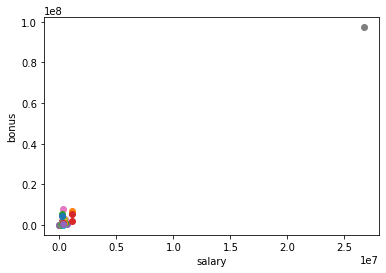

In [8]:
### Task 2: Remove outliers

# Convert data/features to a numpy array to look for outliers
features = ['salary', 'bonus']
data = featureFormat(enron, features)

#Simple Scatter Plot to look at data
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [9]:
# identify index of outlier

df =  pd.DataFrame.from_dict(enron, orient='columns')

df = df.apply(pd.to_numeric, errors='coerce')

outlier = df.loc['bonus',:].idxmax(axis=1)
print (outlier)

TOTAL


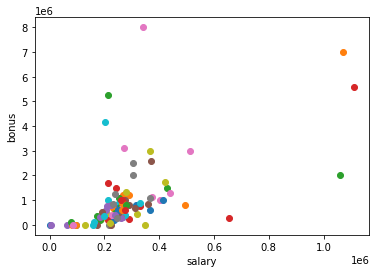

In [10]:
#Remove outlier and replot
enron.pop('TOTAL')

features = ['salary', 'bonus']
data = featureFormat(enron, features)

#Simple Scatter Plot to look at data
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [11]:
df =  pd.DataFrame.from_dict(enron, orient='columns')

df = df.apply(pd.to_numeric, errors='coerce')

pp.pprint(df)

                           METTS MARK  BAXTER JOHN C  ELLIOTT STEVEN  \
salary                       365788.0       267102.0        170941.0   
to_messages                     807.0            NaN             NaN   
deferral_payments                 NaN      1295738.0             NaN   
total_payments              1061827.0      5634343.0        211725.0   
loan_advances                     NaN            NaN             NaN   
bonus                        600000.0      1200000.0        350000.0   
email_address                     NaN            NaN             NaN   
restricted_stock_deferred         NaN            NaN             NaN   
deferred_income                   NaN     -1386055.0       -400729.0   
total_stock_value            585062.0     10623258.0       6678735.0   
expenses                      94299.0        11200.0         78552.0   
from_poi_to_this_person          38.0            NaN             NaN   
exercised_stock_options           NaN      6680544.0       48903

In [12]:
#check names to ensure no duplicates, other outliers
import pprint as pp
pp.pprint(list(enron.keys()))

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HAEDICKE MARK E',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'NOLES JAMES L',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H',
 'SHAPIRO RICHARD S'

In [13]:
pp.pprint(enron['THE TRAVEL AGENCY IN THE PARK'])

#shows all values as NaN

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}


In [14]:
#create a new variable

def submitDict():
    return submit_dict

def computeFraction( poi_messages, all_messages ):
    """ given a number messages to/from POI (numerator) and number of all messages to/from a person (denominator),
        return the fraction of messages to/from that person that are from/to a POI"""
    fraction = 0.
    
    if all_messages == 'NaN':
        fraction = 0.
    else:
        fraction = poi_messages / all_messages
    return fraction

submit_dict = {}

In [15]:
for name in enron:
    data_point = enron[name] #pulls out the embedded dictionary of attributes name is the person's name
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
   
    fraction_from_poi = computeFraction( from_poi_to_this_person, to_messages )
    data_point["fraction_from_poi"] = fraction_from_poi #Add to dictionary of features
    
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = computeFraction( from_this_person_to_poi, from_messages )
   
    submit_dict[name]={"from_poi_to_this_person":fraction_from_poi,
                       "from_this_person_to_poi":fraction_to_poi}
    data_point["fraction_to_poi"] = fraction_to_poi

In [16]:
pp.pprint(enron[])

SyntaxError: invalid syntax (<ipython-input-16-94be47e83cd7>, line 1)

In [ ]:
#Visualize new variable
features2 = ['poi','fraction_from_poi', 'fraction_to_poi']
data = featureFormat(enron, features2)

#%matplotlib qt

#Simple Scatter Plot to look at data
for point in data:
    fraction_from_poi = point[1]
    fraction_to_poi = point[2]
    if point[0] == 1:
        matplotlib.pyplot.scatter(fraction_from_poi,  fraction_to_poi, color="r", marker="D",label='poi')
    else:
        matplotlib.pyplot.scatter(fraction_from_poi,  fraction_to_poi, color="b", label='not poi')

matplotlib.pyplot.xlabel("fraction_from_poi")
matplotlib.pyplot.ylabel("fraction_to_poi")
matplotlib.pyplot.show()

In [ ]:
"""

all_features = []

i=0
for name,features in enron.items():
    if i<1:
        all_features.append(features.keys())
        i +=1 
    
pp.pprint(all_features)"""
            

In [ ]:
### Extract features and labels from dataset for local testing

#create a list of all available features:

financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
                      'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
                      'expenses', 'exercised_stock_options', 'other', 'long_term_incentive',
                      'restricted_stock', 'director_fees']

email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi','fraction_from_poi', 'fraction_to_poi']

POI_label = ['poi']
all_features = POI_label + financial_features + email_features
#print(total_features)

#create "my_dataset" since that's used in the provided dump file
### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = enron

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list)

print(data)


In [ ]:
# use Kbest to identify features to use for further analysis

data = featureFormat(my_dataset, features_list_n, sort_keys = True)
labels, features = targetFeatureSplit(data)
labels, features = targetFeatureSplit(data)

kbest = SelectKBest(f_classif, k=10)  #create classifier

kbest.fit(features,labels)  #fit data to classifier

feature_scores = pd.DataFrame({'features': X.columns, 'Chi2Score': KBest.scores_, 'pValue': KBest.pvalues_ })

print(feature_scores)

# intelligently select features (univariate feature selection)

selector = SelectKBest(f_classif, k = 10)
selector.fit(features, labels)
scores = zip(features_list_n[1:], selector.scores_)
sorted_scores = sorted(scores, key = takeSecond, reverse = True)
pprint.pprint('SelectKBest scores: ')
pprint.pprint( sorted_scores)
all_features =  POI_label + [(i[0]) for i in sorted_scores[0:20]]
pprint.pprint( all_features)
kBest_features = POI_label + [(i[0]) for i in sorted_scores[0:10]]
pprint.pprint( 'KBest')
pprint.pprint( kBest_features)